# Pathways and Eclipse

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy import stats
import cftime
from datetime import datetime

In [67]:
specie = 'SO2'

In [68]:
coords_eu = {
    'lon1': -10,
    'lon2': 25,
    'lat1': 35,
    'lat2': 65
}

In [69]:
coords_wa = {
    'lon1': -20,
    'lon2': 20,
    'lat1': -5,
    'lat2': 20
}

In [70]:
def region_total(emissions, coords):
    emissions_regional = select_region(emissions, coords) 
    return emissions_regional.sum('lat').sum('lon')

def select_region(data, coords):
    return data.sel(lon=slice(coords['lon1'], coords['lon2'])).sel(lat=slice(coords['lat1'], coords['lat2']))

In [71]:
path_ssp126 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP126_yearly.nc'
path_ssp245 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP245_yearly.nc'
path_ssp370 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP370_yearly.nc'
path_ssp460 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP460_yearly.nc'
path_ssp585 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP585_yearly.nc'

In [72]:
ssp126_eu = region_total(xr.open_dataset(path_ssp126)['s3'], coords_eu)
ssp245_eu = region_total(xr.open_dataset(path_ssp245)['s3'], coords_eu)
ssp370_eu = region_total(xr.open_dataset(path_ssp370)['s3'], coords_eu)
ssp460_eu = region_total(xr.open_dataset(path_ssp460)['s3'], coords_eu)
ssp585_eu = region_total(xr.open_dataset(path_ssp585)['s3'], coords_eu)

In [73]:
ssp126_wa = region_total(xr.open_dataset(path_ssp126)['s3'], coords_wa)
ssp245_wa = region_total(xr.open_dataset(path_ssp245)['s3'], coords_wa)
ssp370_wa = region_total(xr.open_dataset(path_ssp370)['s3'], coords_wa)
ssp460_wa = region_total(xr.open_dataset(path_ssp460)['s3'], coords_wa)
ssp585_wa = region_total(xr.open_dataset(path_ssp585)['s3'], coords_wa)

In [74]:
eclipse6_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-V6_Glb_0.5x0.5_anthro_BC_CLE_yearly.nc'

In [75]:
eclipse6_eu = region_total(xr.open_dataset(eclipse6_path)['emis_tra'], coords_eu)
eclipse6_wa = region_total(xr.open_dataset(eclipse6_path)['emis_tra'], coords_wa)

In [76]:
eclipse6_eu['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse6_eu['time'].values]
eclipse6_wa['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse6_wa['time'].values]

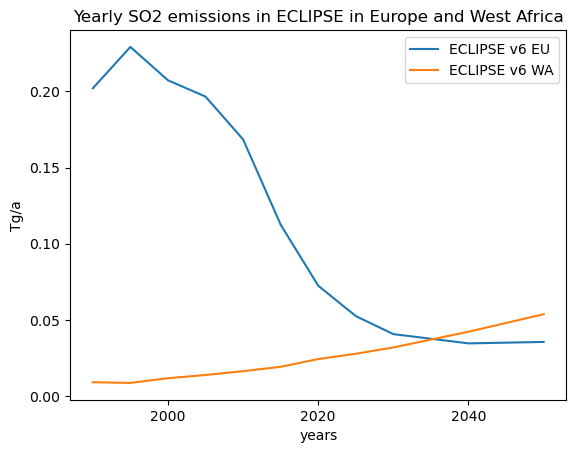

In [77]:
eclipse6_eu.plot(label='ECLIPSE v6 EU')
eclipse6_wa.plot(label='ECLIPSE v6 WA')

plt.title('Yearly '+specie+' emissions in ECLIPSE in Europe and West Africa')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

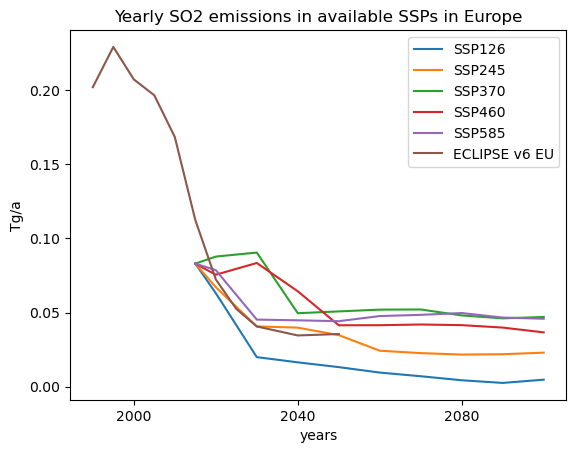

In [78]:
ssp126_eu.plot(label='SSP126')
ssp245_eu.plot(label='SSP245')
ssp370_eu.plot(label='SSP370')
ssp460_eu.plot(label='SSP460')
ssp585_eu.plot(label='SSP585')
eclipse6_eu.plot(label='ECLIPSE v6 EU')

plt.title('Yearly '+specie+' emissions in available SSPs in Europe')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [79]:
ssp126_wa.plot(label='SSP126')
ssp245_wa.plot(label='SSP245')
ssp370_wa.plot(label='SSP370')
ssp460_wa.plot(label='SSP460')
ssp585_wa.plot(label='SSP585')
eclipse6_wa.plot(label='ECLIPSE v6 EU')

plt.title('Yearly '+specie+' emissions in available SSPs in West Africa')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## Which SSP scenario is closer to ECLIPSE v6?

In [80]:
common_time_range = slice(max(ssp126_eu['time'].min(), eclipse6_eu['time'].min()),
                          min(ssp126_eu['time'].max(), eclipse6_eu['time'].max()))

In [81]:
def interpolate(dataset):
    new_time =  xr.cftime_range(start=dataset['time'].values[0], end=dataset['time'].values[-1], freq='1Y')
    empty_da = xr.DataArray(data=None, dims=['time'], coords={'time': new_time})
    empty_ds = empty_da.to_dataset(name='emissions')

    empty_ds['emissions'] = dataset.interp(time=empty_ds['time'])
    return empty_ds.sel(time=common_time_range)['emissions']

In [82]:
eclipse6_eu_interp = interpolate(eclipse6_eu)
eclipse6_wa_interp = interpolate(eclipse6_wa)

In [83]:
ssp126_eu_interp = interpolate(ssp126_eu)
ssp245_eu_interp = interpolate(ssp245_eu)
ssp370_eu_interp = interpolate(ssp370_eu)
ssp460_eu_interp = interpolate(ssp460_eu)
ssp585_eu_interp = interpolate(ssp585_eu)

In [84]:
ssp126_wa_interp = interpolate(ssp126_wa)
ssp245_wa_interp = interpolate(ssp245_wa)
ssp370_wa_interp = interpolate(ssp370_wa)
ssp460_wa_interp = interpolate(ssp460_wa)
ssp585_wa_interp = interpolate(ssp585_wa)

## Results

## BC

### Pearson

In [108]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.9838082653687723
ssp245 eu 0.9958802454937001
ssp370 eu 0.9282812000005504
ssp460 eu 0.9097726137748288
ssp585 eu 0.9584073024833202


In [111]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa 0.7661857653639685
ssp245 wa 0.9904829493369731
ssp370 wa 0.9914439475002073
ssp460 wa 0.7414116894203907
ssp585 wa 0.7924238066121922


### MAE

In [117]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 0.012893578471750778
ssp245 eu 0.006442824651262997
ssp370 eu 0.022049087697454162
ssp460 eu 0.012301613827011825
ssp585 eu 0.01274909062937281


In [116]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 0.01259051129099441
ssp245 wa 0.0053062339464891445
ssp370 wa 0.0062918563501475604
ssp460 wa 0.00735905203764161
ssp585 wa 0.01394626363053364


# CO

In [20]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.9800895456710661
ssp245 eu 0.7713664338259869
ssp370 eu 0.939043785502634
ssp460 eu 0.9434939506178102
ssp585 eu 0.4050096252430889


In [21]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa -0.2750333734850392
ssp245 wa -0.3947147859766557
ssp370 wa 0.9672302343978437
ssp460 wa -0.17840240515289124
ssp585 wa 0.24885005344964187


### MAE

In [22]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 3.3569813958571495
ssp245 eu 3.772849670159548
ssp370 eu 3.4493700028431036
ssp460 eu 3.084000976186851
ssp585 eu 5.034199164976054


In [23]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 3.0231900077603338
ssp245 wa 3.4709379731045775
ssp370 wa 5.319094048740812
ssp460 wa 5.21293380862346
ssp585 wa 7.079711697479517


### NH3

In [42]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.9121998461173156
ssp245 eu 0.3601691991876095
ssp370 eu -0.9526109737269
ssp460 eu 0.9973079389542905
ssp585 eu -0.9587936233314227


In [43]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa -0.9981969210293553
ssp245 wa 0.9957701452766433
ssp370 wa 0.996637245125156
ssp460 wa 0.9969984104048697
ssp585 wa 0.9847686133282656


### MAE

In [44]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 0.020372921931067094
ssp245 eu 0.017399281551839087
ssp370 eu 0.026871339229163363
ssp460 eu 0.013964089415165543
ssp585 eu 0.03878714712532765


In [116]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 0.01259051129099441
ssp245 wa 0.0053062339464891445
ssp370 wa 0.0062918563501475604
ssp460 wa 0.00735905203764161
ssp585 wa 0.01394626363053364


### NOx

In [63]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.9831453449647296
ssp245 eu 0.9911826178094969
ssp370 eu 0.9247255979118434
ssp460 eu 0.9208858429279565
ssp585 eu 0.9299718253872883


In [64]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa 0.954401915490134
ssp245 wa 0.8843522338329395
ssp370 wa 0.9990469336594683
ssp460 wa 0.7712380571553081
ssp585 wa 0.6792124364839445


### MAE

In [65]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 0.8255072302801384
ssp245 eu 1.1001430215443067
ssp370 eu 1.5449231158809302
ssp460 eu 1.3228018463856435
ssp585 eu 1.7314297110445929


In [66]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 0.3992696338647032
ssp245 wa 0.3181695678556035
ssp370 wa 0.458345134960462
ssp460 wa 0.4333155670581266
ssp585 wa 0.6056531182217272


### OC

In [108]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.9838082653687723
ssp245 eu 0.9958802454937001
ssp370 eu 0.9282812000005504
ssp460 eu 0.9097726137748288
ssp585 eu 0.9584073024833202


In [111]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa 0.7661857653639685
ssp245 wa 0.9904829493369731
ssp370 wa 0.9914439475002073
ssp460 wa 0.7414116894203907
ssp585 wa 0.7924238066121922


### MAE

In [117]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 0.012893578471750778
ssp245 eu 0.006442824651262997
ssp370 eu 0.022049087697454162
ssp460 eu 0.012301613827011825
ssp585 eu 0.01274909062937281


In [116]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 0.01259051129099441
ssp245 wa 0.0053062339464891445
ssp370 wa 0.0062918563501475604
ssp460 wa 0.00735905203764161
ssp585 wa 0.01394626363053364


### SO2

In [85]:
print('ssp126 eu',stats.pearsonr(ssp126_eu_interp, eclipse6_eu_interp)[0])
print('ssp245 eu',stats.pearsonr(ssp245_eu_interp, eclipse6_eu_interp)[0])
print('ssp370 eu',stats.pearsonr(ssp370_eu_interp, eclipse6_eu_interp)[0])
print('ssp460 eu',stats.pearsonr(ssp460_eu_interp, eclipse6_eu_interp)[0])
print('ssp585 eu',stats.pearsonr(ssp585_eu_interp, eclipse6_eu_interp)[0])

ssp126 eu 0.981024906502848
ssp245 eu 0.9842040463158075
ssp370 eu 0.6098132223185342
ssp460 eu 0.5070431470298273
ssp585 eu 0.9618170840726155


In [86]:
print('ssp126 wa',stats.pearsonr(ssp126_wa_interp, eclipse6_wa_interp)[0])
print('ssp245 wa',stats.pearsonr(ssp245_wa_interp, eclipse6_wa_interp)[0])
print('ssp370 wa',stats.pearsonr(ssp370_wa_interp, eclipse6_wa_interp)[0])
print('ssp460 wa',stats.pearsonr(ssp460_wa_interp, eclipse6_wa_interp)[0])
print('ssp585 wa',stats.pearsonr(ssp585_wa_interp, eclipse6_wa_interp)[0])

ssp126 wa -0.6799934912349745
ssp245 wa -0.3736078413063335
ssp370 wa 0.42935406691202427
ssp460 wa -0.7447236269813675
ssp585 wa -0.7816002153878066


### MAE

In [87]:
print('ssp126 eu', np.mean(np.abs(eclipse6_eu_interp - ssp126_eu_interp)).values)
print('ssp245 eu', np.mean(np.abs(eclipse6_eu_interp - ssp245_eu_interp)).values)
print('ssp370 eu', np.mean(np.abs(eclipse6_eu_interp - ssp370_eu_interp)).values)
print('ssp460 eu', np.mean(np.abs(eclipse6_eu_interp - ssp460_eu_interp)).values)
print('ssp585 eu', np.mean(np.abs(eclipse6_eu_interp - ssp585_eu_interp)).values)

ssp126 eu 0.0177016646464204
ssp245 eu 0.003956663646285081
ssp370 eu 0.025106500558802994
ssp460 eu 0.024266677807134426
ssp585 eu 0.00851117660344347


In [88]:
print('ssp126 wa', np.mean(np.abs(eclipse6_wa_interp - ssp126_wa_interp)).values)
print('ssp245 wa', np.mean(np.abs(eclipse6_wa_interp - ssp245_wa_interp)).values)
print('ssp370 wa', np.mean(np.abs(eclipse6_wa_interp - ssp370_wa_interp)).values)
print('ssp460 wa', np.mean(np.abs(eclipse6_wa_interp - ssp460_wa_interp)).values)
print('ssp585 wa', np.mean(np.abs(eclipse6_wa_interp - ssp585_wa_interp)).values)

ssp126 wa 0.022602293350502352
ssp245 wa 0.02485324459372784
ssp370 wa 0.03224627529046773
ssp460 wa 0.03950467846730684
ssp585 wa 0.025074521519112495
